In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("E:/Users/USER/Desktop/DataAnalytics And gen AI/Data/ML/CAR DETAILS FROM CAR DEKHO.csv")
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

In [3]:
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [5]:
df.corr(numeric_only=True)

,year,selling_price,km_driven
year,1.000000,0.413922,-0.419688
selling_price,0.413922,1.000000,-0.192289
km_driven,-0.419688,-0.192289,1.000000


In [6]:
#Split all columns into numeric columns and obj columns
numeric = []
categorical = [] 
for i in df.columns:
    if df[i].dtype == 'O':
        categorical.append(i)
    else:
        numeric.append(i)

In [7]:
numeric,categorical

(['year', 'selling_price', 'km_driven'],
 ['name', 'fuel', 'seller_type', 'transmission', 'owner'])

In [8]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [9]:
VFI_dataset = pd.DataFrame()

In [10]:
VFI_dataset["Feature"] = numeric

In [11]:
VFI_dataset

,Feature
0,year
1,selling_price
2,km_driven


In [12]:
#Now to find VIF
vfi_cal = []
for i in range(len(numeric)):
    v = variance_inflation_factor(df[numeric],i)
    vfi_cal.append(v)

In [13]:
VFI_dataset["VFI"] = vfi_cal
VFI_dataset

,Feature,VFI
0,year,4.372117
1,selling_price,1.830031
2,km_driven,3.124138


In [14]:
#The VFI of all numeric features is below the 10, so now we can build the model

In [15]:
#Problem statement: To predict the selling price based on km_driven and year
x = df[["km_driven","year"]]
y = df["selling_price"]

In [16]:
#Split train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [17]:
x_train.shape,x_test.shape

((3472, 2), (868, 2))

In [18]:
y_train

1578     450000
1894      65000
3990     300000
4156     210000
602      750000
         ...   
4167     250000
4096    1250000
955      110000
3222     260000
2352     260000
Name: selling_price, Length: 3472, dtype: int64

In [19]:
#Train the model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model

LinearRegression()

In [20]:
model.fit(x_train,y_train)

LinearRegression()

In [21]:
y_pred = model.predict(x_test)

In [22]:
#Model evaluation
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.1920283068799331

In [23]:
#Drop the year column then predict selling price
numeric.remove("year")

In [24]:
numeric

['selling_price', 'km_driven']

In [25]:
x = df[["km_driven"]]
y = df["selling_price"]

In [26]:
df.corr(numeric_only=True)

,year,selling_price,km_driven
year,1.000000,0.413922,-0.419688
selling_price,0.413922,1.000000,-0.192289
km_driven,-0.419688,-0.192289,1.000000


In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y)


In [28]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [29]:
model.fit(x_train,y_train)

LinearRegression()

In [30]:
y_pred = model.predict(x_test)

In [31]:
x_train,x_test

(      km_driven
 1305      70000
 2560      80000
 278      110000
 3775       5000
 1362      70000
 ...         ...
 2919      70000
 1487      83000
 3835      80000
 79        54000
 3317      50000
 
 [3255 rows x 1 columns],
       km_driven
 291       10000
 1715        101
 3460      83000
 2944      37605
 3534      15000
 ...         ...
 3927      40000
 616        7104
 2040      45000
 3419      90000
 364       40000
 
 [1085 rows x 1 columns])

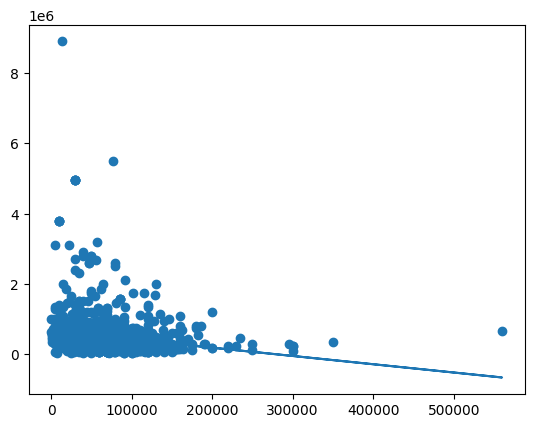

In [32]:
#Visualise
plt.scatter(x_test,y_test)
plt.plot(x_test,y_pred)

In [33]:
#not a good model 
#To requrired more feature engg.

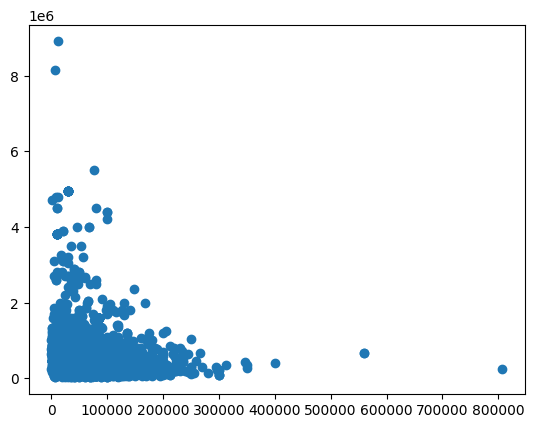

In [34]:
plt.scatter(x,y)

{'whiskers': [<matplotlib.lines.Line2D at 0x19e25bd7560>,
 'caps': [<matplotlib.lines.Line2D at 0x19e27fb2b70>,
 'boxes': [<matplotlib.lines.Line2D at 0x19e27f71a90>],
 'medians': [<matplotlib.lines.Line2D at 0x19e27ff0920>],
 'fliers': [<matplotlib.lines.Line2D at 0x19e27ff0b30>],
 'means': []}

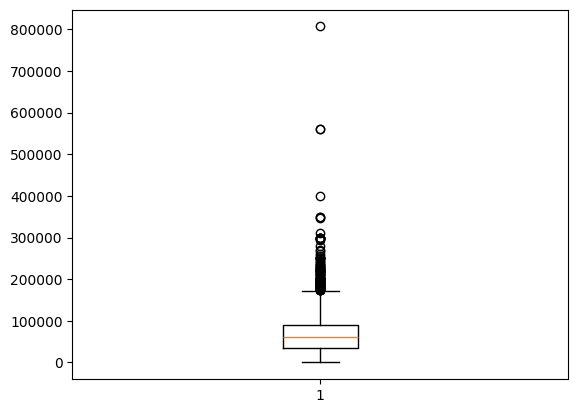

In [35]:
plt.boxplot(x)

{'whiskers': [<matplotlib.lines.Line2D at 0x19e2802fef0>,
 'caps': [<matplotlib.lines.Line2D at 0x19e280a44a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x19e2802fd10>],
 'medians': [<matplotlib.lines.Line2D at 0x19e280a48c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x19e280a4b30>],
 'means': []}

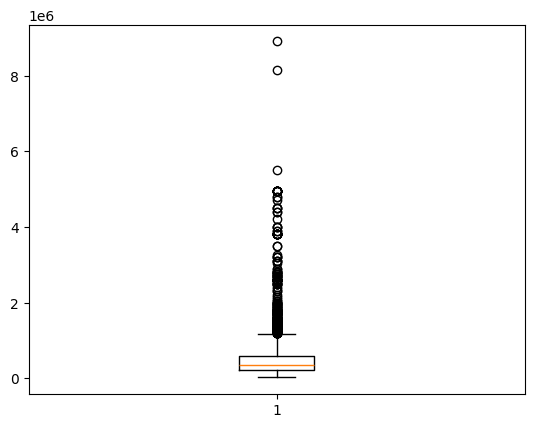

In [36]:
plt.boxplot(y)